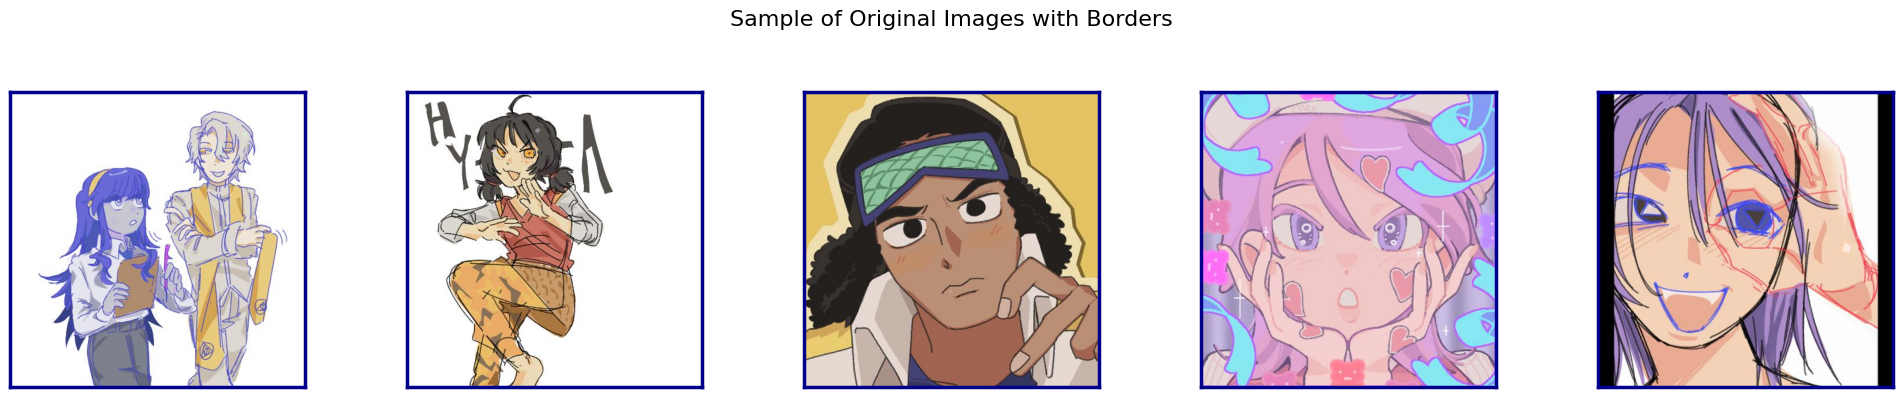

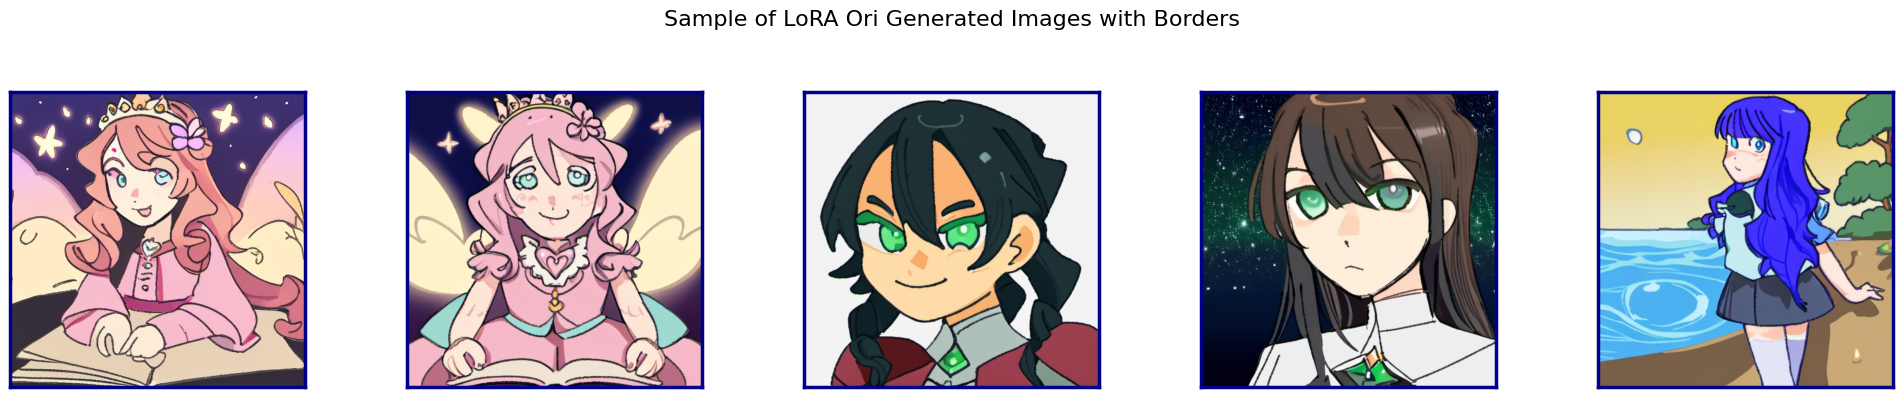

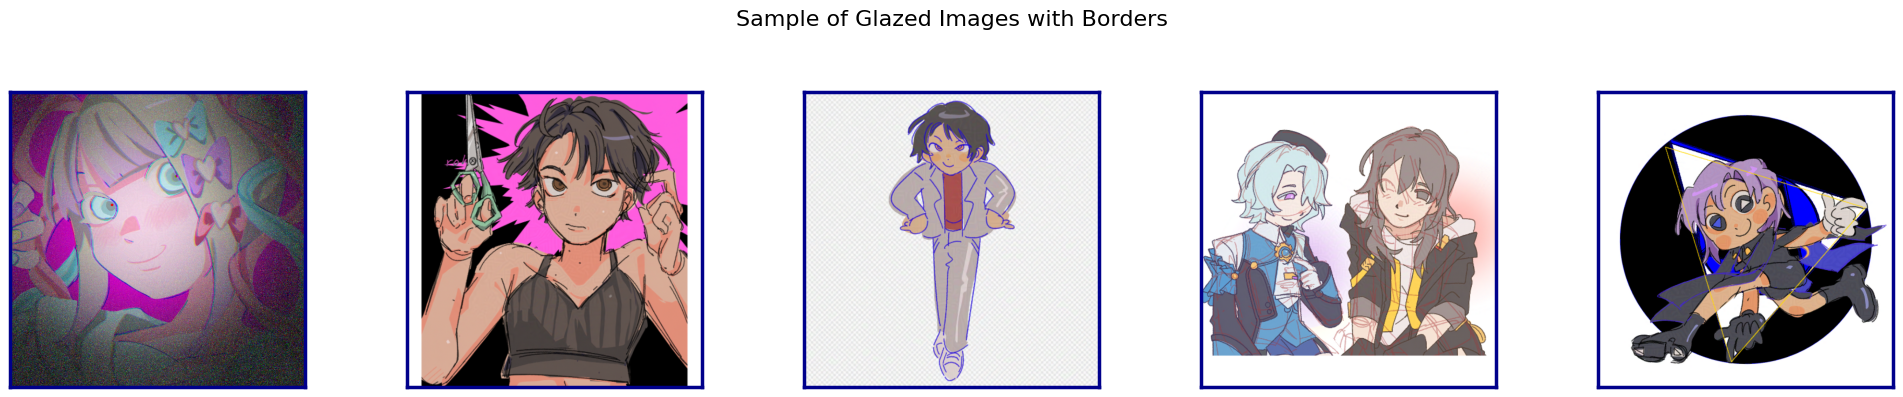

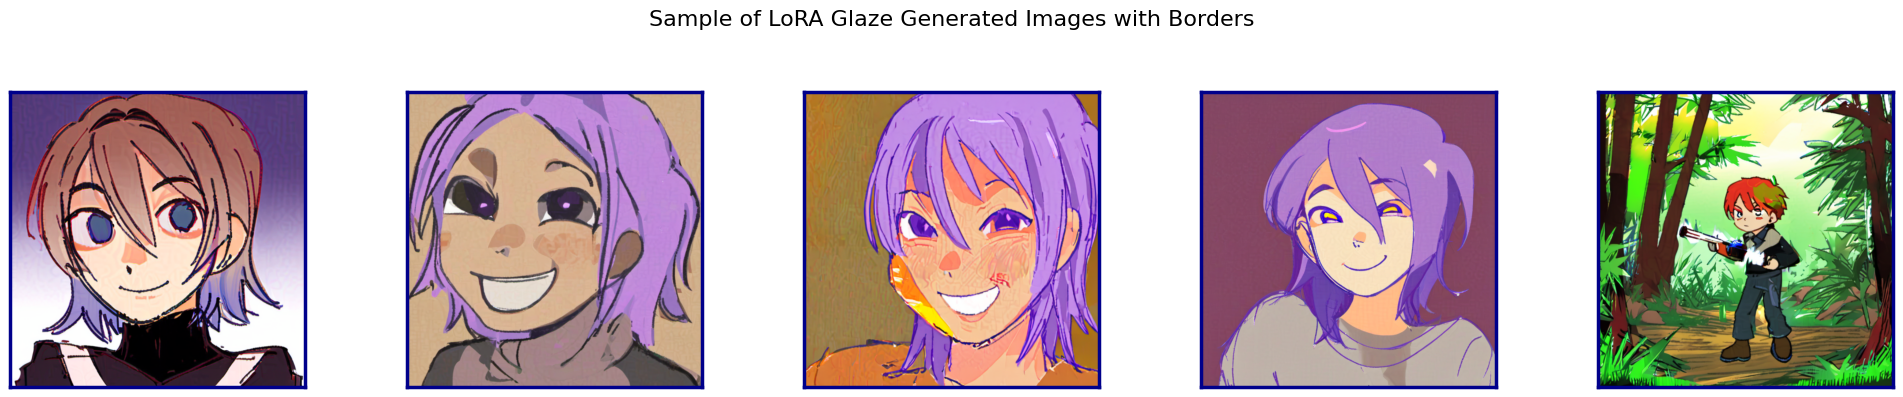

In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Assume you have the image paths from your notebook
glz_path = r'D:\GLAZE-evaluation\dataset\512-glz'
lora_glz_path = r'D:\GLAZE-evaluation\dataset\512-lora-glz'
lora_ori_path = r'D:\GLAZE-evaluation\dataset\512-lora-ori'
ori_path = r'D:\GLAZE-evaluation\dataset\512-ori'

def plot_image_grid(path, title, num_images=5):
    """Function to display a grid of sample images with statistical borders."""
    
    # NOTE: This part assumes the paths and files are accessible on your local system.
    try:
        image_files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        if not image_files:
            print(f"No image files found in {path}. Skipping plot.")
            return
    except Exception as e:
        print(f"Error accessing {path}: {e}. Skipping plot.")
        return

    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    # Set up the figure
    fig, axes = plt.subplots(1, len(sample_files), figsize=(20, 4))
    fig.suptitle(title, fontsize=16)

    # Handle the case where only one image is selected
    if len(sample_files) == 1:
        axes = [axes]

    for ax, file_name in zip(axes, sample_files):
        try:
            img = Image.open(os.path.join(path, file_name))
            ax.imshow(img)
            
            # 1. Turn off axis labels and ticks (keeps the border clean)
            ax.set_xticks([])
            ax.set_yticks([])
            
            # 2. Add custom border (spines)
            for spine in ax.spines.values():
                # Set a formal color and thickness for the border
                spine.set_edgecolor('darkblue')
                spine.set_linewidth(2.5) 
                spine.set_visible(True)
                
        except Exception as e:
            # Fallback if image loading fails
            print(f"Could not load or plot image {file_name}: {e}")
            ax.axis('off') # Hide the empty subplot
            
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    # The code will now use plt.show() on your local machine to display all four figures.

# Plotting the grids (This will generate four separate plots, each with borders)
plot_image_grid(ori_path, 'Sample of Original Images with Borders')
plot_image_grid(lora_ori_path, 'Sample of LoRA Ori Generated Images with Borders')
plot_image_grid(glz_path, 'Sample of Glazed Images with Borders')
plot_image_grid(lora_glz_path, 'Sample of LoRA Glaze Generated Images with Borders')
plt.show()